In [3]:
!cd ../../ && python3 setup.py build_ext --inplace
%load_ext autoreload
%autoreload 2

import plotly.express as px
from plotly.offline import init_notebook_mode
# Initialize the Plotly notebook mode
init_notebook_mode(connected=True)

Found following files to build:
 src/nanopyx/core/transform/noise/randomNoise.pyx
running build_ext


In [69]:
import numpy as np

# create an intensity gradient image
w = 64
h = 64
image = np.zeros((w, h), dtype="float32")
for i in range(w):
    image[:, i] = (i/w) * 1000
image_original = image.copy()

px.imshow(image).show()
px.histogram(x=image.flatten()).show()


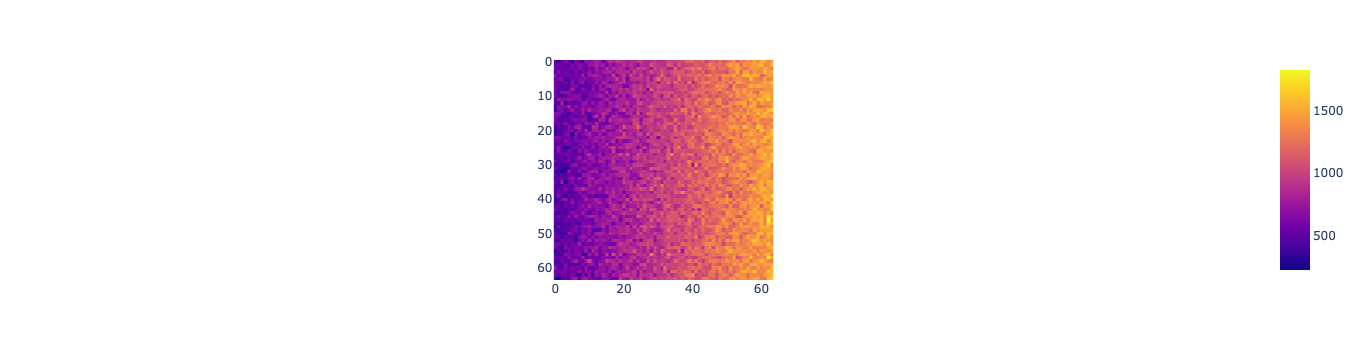

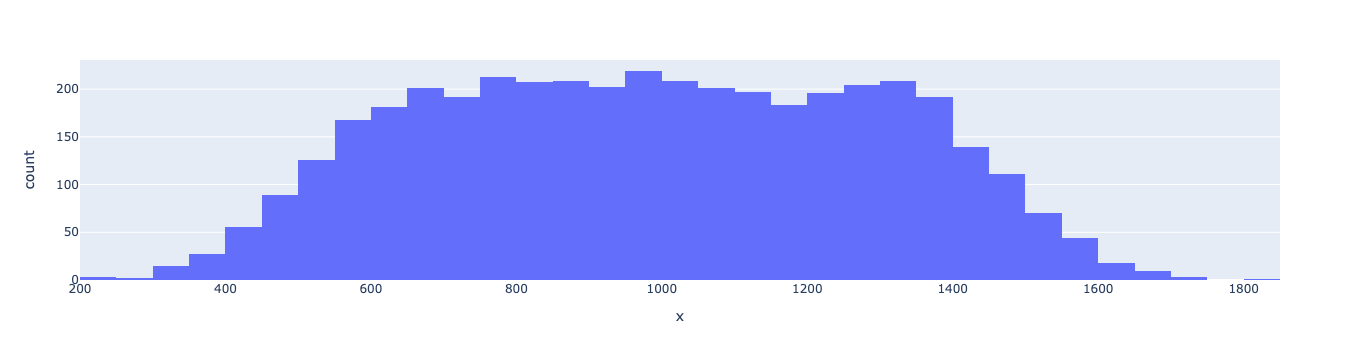

In [2]:
from nanopyx.core.transform.noise.randomNoise import addMixedGaussianPoissonNoise, addMixedGaussianPoissonNoise2

image = image_original.copy()
image_flat = image.ravel()
addMixedGaussianPoissonNoise2(image_flat, gaussSigma = 100, gaussMean = 500)

px.imshow(image).show()
px.histogram(x=image.flatten()).show()


In [3]:
gaussSigma = 100
gaussMean = 500

image = image_original.copy() 
%timeit addMixedGaussianPoissonNoise2(image, gaussSigma = gaussSigma, gaussMean = gaussMean)

image = image_original.copy()
%timeit addMixedGaussianPoissonNoise(image.ravel(), gaussSigma = gaussSigma, gaussMean = gaussMean)

369 µs ± 23.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.2 ms ± 33.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
